In [1]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

In [2]:
df = pd.read_csv("./a1_data/a1_d1.csv",sep=",",header=None)

In [3]:
df.columns=['F1','F2','C']

In [4]:
df_train=df.iloc[:800, :]
df_test=df.iloc[800:, :]

In [5]:
df1=df_train[df_train['C']==0]
df2=df_train[df_train['C']==1]

In [6]:
m0=df1.mean().values.reshape(3,1)
m0=m0[0:2]
m1=df2.mean().values.reshape(3,1)
m1=m1[0:2]
print(m0)

[[-0.00488277]
 [-1.00978039]]


In [7]:
X0=df1.iloc[:,0:2]
X1=df2.iloc[:,0:2]

In [8]:
x=X0[0:1].values.reshape(2,1)
print(X0.size)
print(x-m0)

792
[[ 1.17469736]
 [-0.0629663 ]]


In [9]:
within_class_scatter_matrix=np.zeros((2,2))
print(m1)
s=np.zeros((2,2))
for i in range(0,(int)((X0.size)/2)):
    x=X0[i:i+1].values.reshape(2,1)
    a=(x-m0).dot((x-m0).T)
    #print(a)
    s+=a
within_class_scatter_matrix+=s
s=np.zeros((2,2))
for i in range(0,(int)((X1.size)/2)):
    x=X1[i:i+1].values.reshape(2,1)
    s+=(x-m1).dot((x-m1).T)
within_class_scatter_matrix+=s

[[0.03164023]
 [0.96996855]]


In [10]:
within_class_scatter_matrix

array([[748.75461072, -27.34204729],
       [-27.34204729, 132.47900518]])

In [11]:
m=m0-m1
print(m)

[[-0.036523  ]
 [-1.97974894]]


In [12]:
w=np.linalg.inv(within_class_scatter_matrix).dot(m)

In [13]:
w

array([[-0.00059899],
       [-0.01506749]])

In [14]:
points0=w.T.dot(X0.T)
points1=w.T.dot(X1.T)

In [15]:
points0[0].size

396

In [16]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

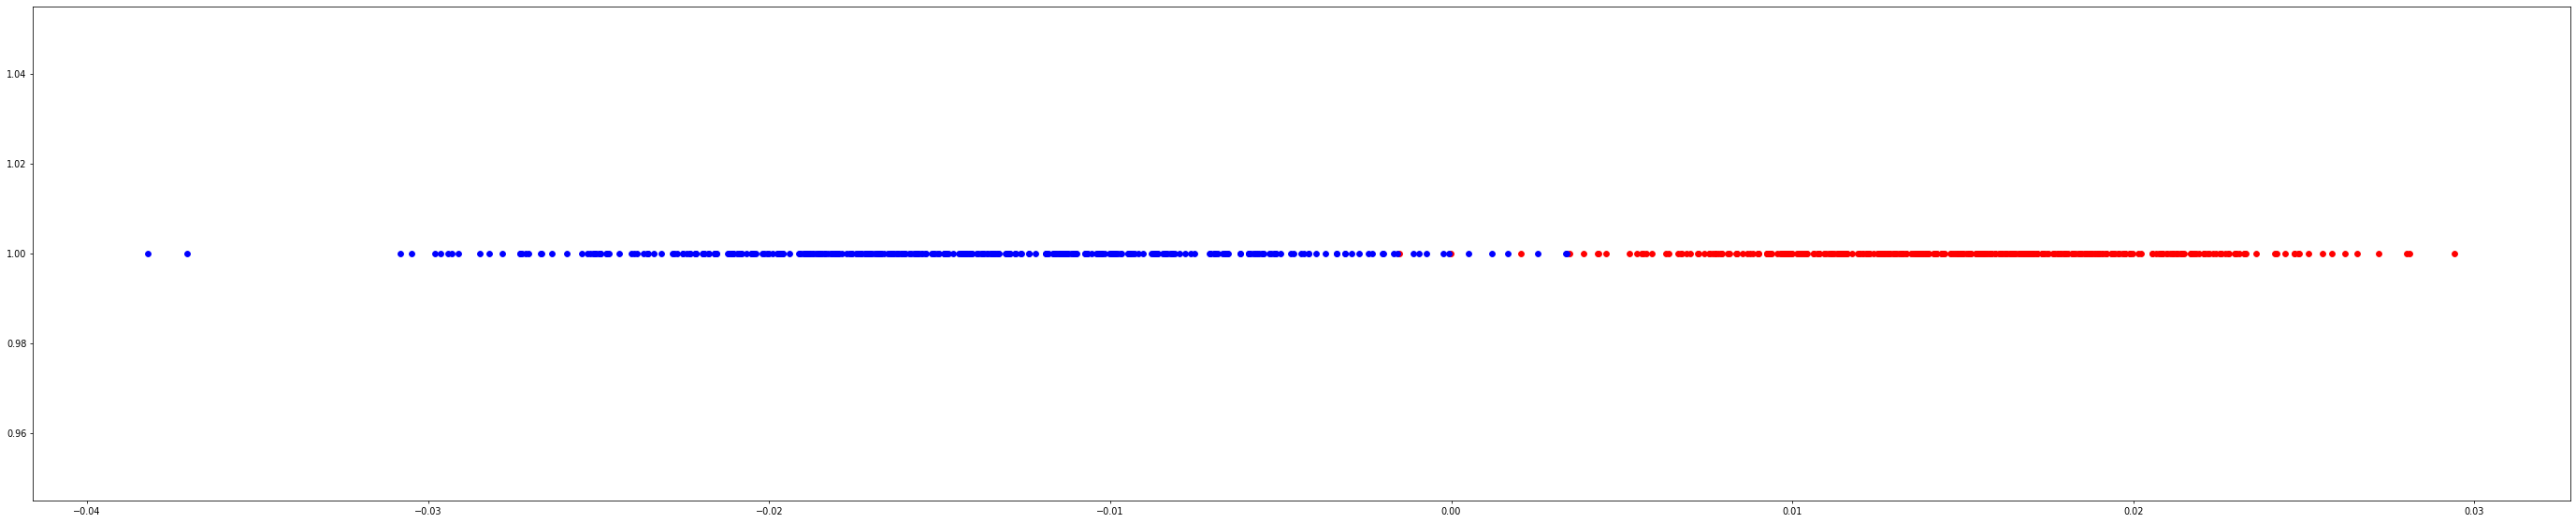

In [17]:
width_in_inches = 50
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
plt.plot(points0[0],[1]*points0[0].size,'ro')
plt.plot(points1[0],[1]*points1[0].size,'bo')
plt.savefig("Line")
plt.show()

[0.09776105 0.00221927]
[0.00221927]


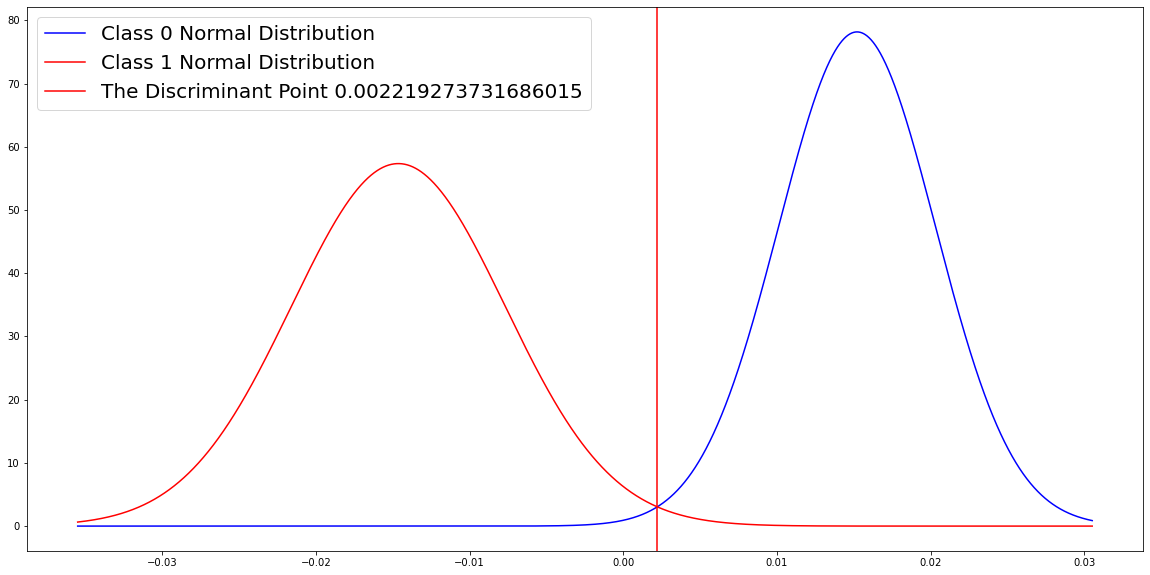

In [18]:
h0=sorted(points0[0])
h1=sorted(points1[0])
m11=np.mean(h0)
m2=np.mean(h1)
std1=np.std(h0)
std2=np.std(h1)
result = solve(m11,m2,std1,std2)
print(result)
a=min(m11-3*std1,m2-3*std2)
b=max(m11+3*std1,m2+3*std2)
x=np.linspace(a,b,10000)
plt.figure(figsize=(20,10))
fit0 = stats.norm.pdf(x, np.mean(h0), np.std(h0))
fit1 = stats.norm.pdf(x, np.mean(h1), np.std(h1))
plt.plot(x,fit0,'b-',label='Class 0 Normal Distribution')
plt.plot(x,fit1,'r-',label='Class 1 Normal Distribution')
result=result[1:]
print(result)
plt.axvline(result,label='The Discriminant Point '+str(result[0]),c="red")
plt.legend(prop={'size':20})
plt.savefig("Normal1")
plt.show()           

In [19]:
x=df_test.iloc[:,0:2]
t=df_test.iloc[:,2:]
p0=result[0]
points=w.T.dot(x.T)
pred=[]
m=0
c=0
for p in points[0]:
    if(p>p0):
        pred.append(0)
    else:
        pred.append(1)

In [20]:
tn=0
tp=0
fn=0
fp=0
c=0
for i in range(0,len(pred)):
    if(pred[i]==t[c:c+1].values.reshape(1,1)):
        if(t[c:c+1].values.reshape(1,1)==1):
            tp+=1
        else:
            tn+=1
    else:
        if(t[c:c+1].values.reshape(1,1)==1):
            fn+=1
        else:
            fp+=1
    c=c+1
pr=tp/(tp+fp)
re=tp/(tp+fn)
print("Accuracy: ",(tp+tn)/(tp+tn+fp+fn))
print("Precision: ",pr)
print("recall: ",re)
print("F-Score: ",2*pr*re/(pr+re))

Accuracy:  0.995
Precision:  1.0
recall:  0.9895833333333334
F-Score:  0.9947643979057591
